# About this data
This dataset describes the medical records for Pima Indians
and whether each patient will have an onset of diabetes within five years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [22]:
import pandas as pd

feature_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv('./data/pima-indians-diabetes.csv',
                 names=feature_names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.shape
# we have 768 rows and 9 columns

(768, 9)

In [24]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df.groupby('class').size()

class
0    500
1    268
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<Axes: xlabel='preg', ylabel='preg'>,
        <Axes: xlabel='plas', ylabel='preg'>,
        <Axes: xlabel='pres', ylabel='preg'>,
        <Axes: xlabel='skin', ylabel='preg'>,
        <Axes: xlabel='test', ylabel='preg'>,
        <Axes: xlabel='mass', ylabel='preg'>,
        <Axes: xlabel='pedi', ylabel='preg'>,
        <Axes: xlabel='age', ylabel='preg'>,
        <Axes: xlabel='class', ylabel='preg'>],
       [<Axes: xlabel='preg', ylabel='plas'>,
        <Axes: xlabel='plas', ylabel='plas'>,
        <Axes: xlabel='pres', ylabel='plas'>,
        <Axes: xlabel='skin', ylabel='plas'>,
        <Axes: xlabel='test', ylabel='plas'>,
        <Axes: xlabel='mass', ylabel='plas'>,
        <Axes: xlabel='pedi', ylabel='plas'>,
        <Axes: xlabel='age', ylabel='plas'>,
        <Axes: xlabel='class', ylabel='plas'>],
       [<Axes: xlabel='preg', ylabel='pres'>,
        <Axes: xlabel='plas', ylabel='pres'>,
        <Axes: xlabel='pres', ylabel='pres'>,
        <Axes: xlabel='skin', yl

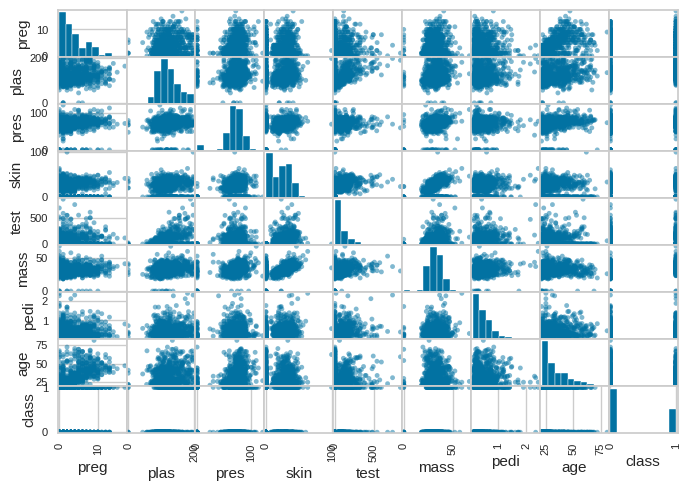

In [27]:
from pandas.plotting import scatter_matrix

scatter_matrix(df)

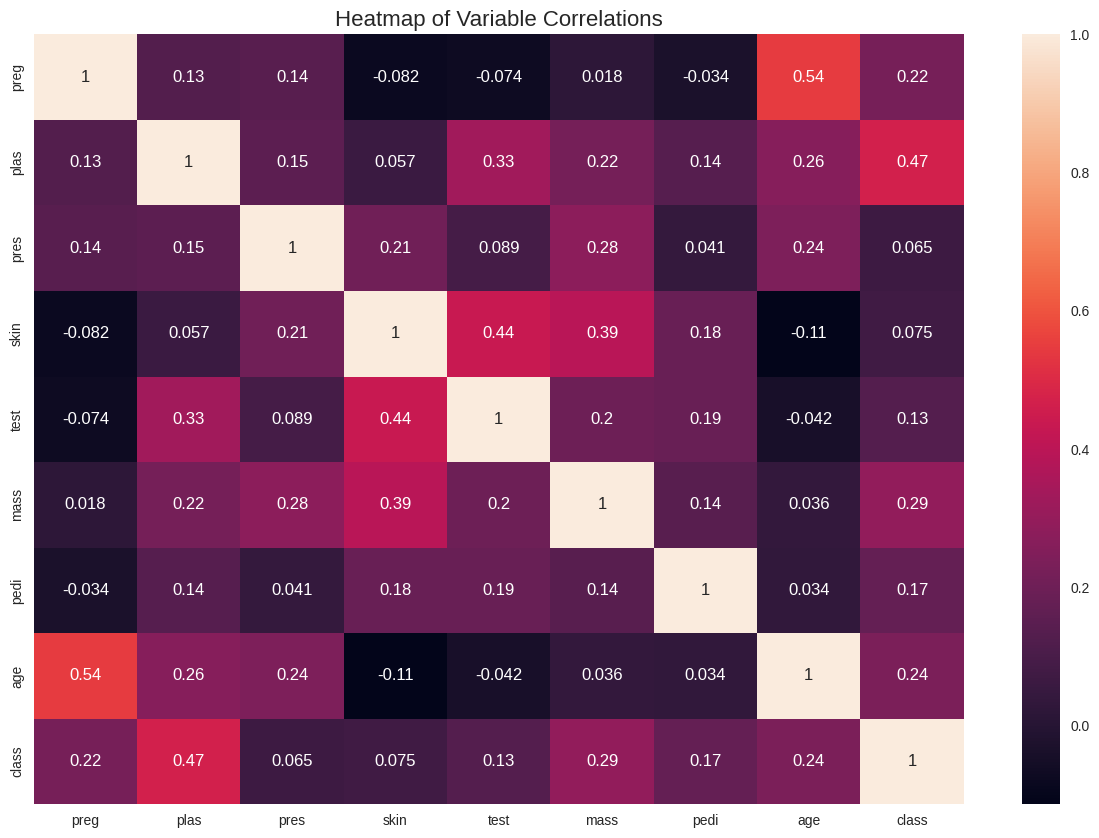

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap of Variable Correlations', fontsize=16)
plt.show()

# Conclusion
# 1. There are no missing values in this dataset.
# 2. The correlation between the variables is not very high except the plas and the  age and mass.

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

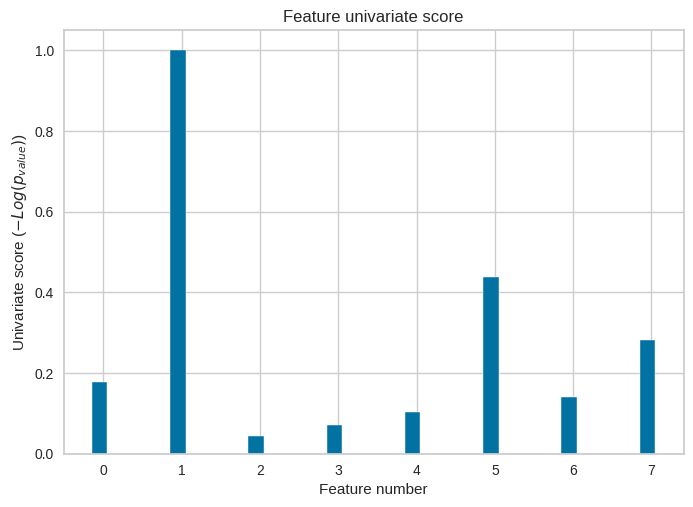

In [30]:
import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

# Feature selection
the selected features are: plas,mass,age using the uni variate feature selection method

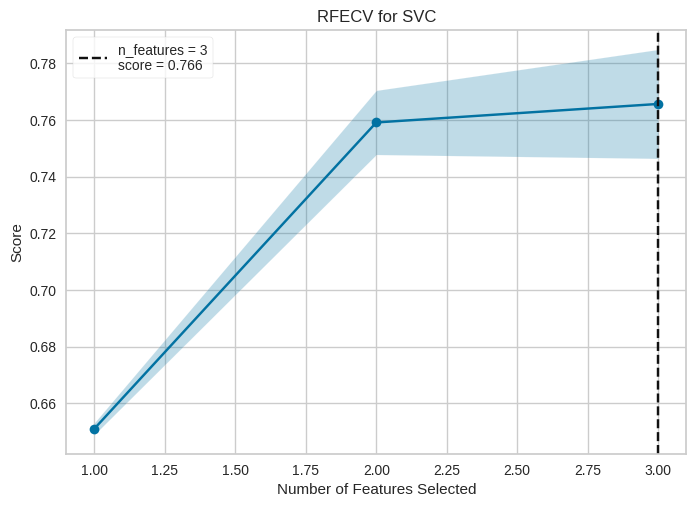

<Axes: title={'center': 'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [57]:
from sklearn.svm import SVC

from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=5, step=10)

selector.fit(X, y)

print(selector.support_)

print(selector.ranking_)

In [39]:
from sklearn.decomposition import PCA

#Principal Component Analysis
pca = PCA(n_components=4)
fit = pca.fit(X)
fit.explained_variance_ratio_

array([0.88854663, 0.06159078, 0.02579012, 0.01308614])

In [40]:
fit.components_

array([[-2.02176587e-03,  9.78115765e-02,  1.60930503e-02,
         6.07566861e-02,  9.93110844e-01,  1.40108085e-02,
         5.37167919e-04, -3.56474430e-03],
       [-2.26488861e-02, -9.72210040e-01, -1.41909330e-01,
         5.78614699e-02,  9.46266913e-02, -4.69729766e-02,
        -8.16804621e-04, -1.40168181e-01],
       [-2.24649003e-02,  1.43428710e-01, -9.22467192e-01,
        -3.07013055e-01,  2.09773019e-02, -1.32444542e-01,
        -6.39983017e-04, -1.25454310e-01],
       [-4.90459604e-02,  1.19830016e-01, -2.62742788e-01,
         8.84369380e-01, -6.55503615e-02,  1.92801728e-01,
         2.69908637e-03, -3.01024330e-01]])

# Conclusion

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

-> the best features are: preg, mass, pedi


In [72]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Initialize a feature selector (SelectKBest with f_classif)
selector = SelectKBest(score_func=f_classif, k=3)

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a classifier on the selected features
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_feature_indices)
print("Selected feature names:", df.columns[selected_feature_indices])

Accuracy: 0.73
Selected feature indices: [0 1 2]
Selected feature names: Index(['preg', 'plas', 'pres'], dtype='object')


# Final result:
->Uni variate feature selection:plas,mass,age 
->Recursive feature elimination: preg, pedi, age
-> Feature importance using RandomForestClassifier : plas mass age

we're going to select plas, mass, age as the best features

In [50]:
# feature selection
new_df = df[['plas', 'mass', 'age', 'class']]
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

new_df.head()

,plas,mass,age,class
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [42]:
feature_ranges = new_df.max() - new_df.min()

print("Feature Ranges:")
print(feature_ranges)

Feature Ranges:
plas     199.0
mass      67.1
age       60.0
class      1.0
dtype: float64


In [47]:
from sklearn.preprocessing import MinMaxScaler

# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# using standard scaler
# scaler = StandardScaler()
# using min max scaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
X_normalized = scaler.fit_transform(X)

In [48]:
# Print mean and standard deviation of the normalized features
print("Mean of Normalized Features:")
print(X_normalized.mean(axis=0))

print("\nStandard Deviation of Normalized Features:")
print(X_normalized.std(axis=0))


Mean of Normalized Features:
[0.60751021 0.47678954 0.20401476]

Standard Deviation of Normalized Features:
[0.16056179 0.11742214 0.19587621]


In [51]:
### PART 2 (Classification)
# Split your data into training and testing sets to evaluate the performance of your model.
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)



In [61]:
# Standardize the feature values to ensure that all features contribute equally to the distance computation in KNN.
# scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [92]:
from onedal.neighbors import KNeighborsClassifier
from joblib import dump

k_best = 0
last_accuracy = 0
# Example: Grid search for the optimal k value
for k in range(1, 10):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_best = k if accuracy > last_accuracy else k_best
    last_accuracy = accuracy
    print(f'k={k}, Accuracy: {accuracy}')

print(f'Best k={k_best}')


k=1, Accuracy: 1.0
k=2, Accuracy: 1.0
k=3, Accuracy: 1.0
k=4, Accuracy: 1.0
k=5, Accuracy: 1.0
k=6, Accuracy: 1.0
k=7, Accuracy: 1.0
k=8, Accuracy: 1.0
k=9, Accuracy: 1.0
Best k=1


['knn_classifier.joblib']

In [ ]:
# save the best model to disk
knn_classifier = KNeighborsClassifier(n_neighbors=k_best)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'k={k_best}, Accuracy: {accuracy}')
# save the model to disk
dump(knn_classifier, 'knn_classifier.joblib')

In [78]:
# Create and train the Decision Tree model using the training data
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Use the trained Decision Tree model to make predictions on the test set.
y_pred = decision_tree_classifier.predict(X_test)

In [80]:
# Example: Grid search for the optimal max_depth
for depth in range(1, 10):
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'max_depth={depth}, Accuracy: {accuracy}')


max_depth=1, Accuracy: 0.7402597402597403
max_depth=2, Accuracy: 0.7727272727272727
max_depth=3, Accuracy: 0.7597402597402597
max_depth=4, Accuracy: 0.7012987012987013
max_depth=5, Accuracy: 0.7272727272727273
max_depth=6, Accuracy: 0.7207792207792207
max_depth=7, Accuracy: 0.7207792207792207
max_depth=8, Accuracy: 0.7207792207792207
max_depth=9, Accuracy: 0.7142857142857143


In [ ]:
 # Artificial Neural Network (ANN) 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)  # Assuming binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

# Additional metrics
print(classification_report(y_test, y_pred_binary))
print(confusion_matrix(y_test, y_pred_binary))

dump(model, 'ann_classifier.joblib')



In [93]:
from joblib import dump
# Support Vector Machine (SVM)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# SVM with Linear Kernel
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# SVM with Polynomial Kernel
poly_svm = svm.SVC(kernel='poly', degree=3)  # You can adjust the degree as needed
poly_svm.fit(X_train, y_train)

# SVM with Gaussian (RBF) Kernel
rbf_svm = svm.SVC(kernel='rbf', gamma='auto')  # You can adjust gamma as needed
rbf_svm.fit(X_train, y_train)

# Evaluate the models
linear_accuracy = linear_svm.score(X_test, y_test)
poly_accuracy = poly_svm.score(X_test, y_test)
rbf_accuracy = rbf_svm.score(X_test, y_test)

print(f"Linear SVM Accuracy: {linear_accuracy}")
print(f"Polynomial SVM Accuracy: {poly_accuracy}")
print(f"Gaussian SVM Accuracy: {rbf_accuracy}")

# save the models to disk
dump(linear_svm, 'linear_svm.joblib')
dump(poly_svm, 'poly_svm.joblib')
dump(rbf_svm, 'rbf_svm.joblib')




Linear SVM Accuracy: 1.0
Polynomial SVM Accuracy: 0.9777777777777777
Gaussian SVM Accuracy: 1.0


['rbf_svm.joblib']

In [94]:
# Predictions
y_pred_linear = linear_svm.predict(X_test)
y_pred_poly = poly_svm.predict(X_test)
y_pred_rbf = rbf_svm.predict(X_test)

# Classification Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear SVM Accuracy: {accuracy_linear}")
print(f"Polynomial SVM Accuracy: {accuracy_poly}")
print(f"Gaussian SVM Accuracy: {accuracy_rbf}")


Linear SVM Accuracy: 1.0
Polynomial SVM Accuracy: 0.9777777777777777
Gaussian SVM Accuracy: 1.0


In [98]:
from sklearn.metrics import log_loss

# Logarithmic Loss
loss_linear = log_loss(y_test, linear_svm.decision_function(X_test))
loss_poly = log_loss(y_test, poly_svm.decision_function(X_test))
loss_rbf = log_loss(y_test, rbf_svm.decision_function(X_test))

print(f"Linear SVM Logarithmic Loss: {loss_linear}")
print(f"Polynomial SVM Logarithmic Loss: {loss_poly}")
print(f"Gaussian SVM Logarithmic Loss: {loss_rbf}")

Linear SVM Logarithmic Loss: 0.677250806039726
Polynomial SVM Logarithmic Loss: 0.6813756011089609
Gaussian SVM Logarithmic Loss: 0.6341214486968738


/home/sohaib/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/sohaib/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/sohaib/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [99]:
from sklearn.metrics import roc_auc_score

# Area Under ROC Curve

roc_auc_linear = roc_auc_score(y_test == 0, linear_svm.decision_function(X_test)[:, 0])
roc_auc_poly = roc_auc_score(y_test == 0, poly_svm.decision_function(X_test)[:, 0])
roc_auc_rbf = roc_auc_score(y_test == 0, rbf_svm.decision_function(X_test)[:, 0])

print(f"Linear SVM AUC: {roc_auc_linear}")
print(f"Polynomial SVM AUC: {roc_auc_poly}")
print(f"Gaussian SVM AUC: {roc_auc_rbf}")



Linear SVM AUC: 1.0
Polynomial SVM AUC: 1.0
Gaussian SVM AUC: 1.0


In [100]:
# Confusion Matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

print("Confusion Matrix - Linear SVM:")
print(conf_matrix_linear)

print("Confusion Matrix - Polynomial SVM:")
print(conf_matrix_poly)

print("Confusion Matrix - Gaussian SVM:")
print(conf_matrix_rbf)


Confusion Matrix - Linear SVM:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Confusion Matrix - Polynomial SVM:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Confusion Matrix - Gaussian SVM:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [101]:
# Classification Report
class_report_linear = classification_report(y_test, y_pred_linear)
class_report_poly = classification_report(y_test, y_pred_poly)
class_report_rbf = classification_report(y_test, y_pred_rbf)

print("Classification Report - Linear SVM:")
print(class_report_linear)

print("Classification Report - Polynomial SVM:")
print(class_report_poly)

print("Classification Report - Gaussian SVM:")
print(class_report_rbf)

Classification Report - Linear SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Classification Report - Polynomial SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Classification Report - Gaussian SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1   